# Statistics Journey Part 1 
### In this series of notebooks I want to try to code and use most important concepts in statistics

### 0. Importing libraries

In [2]:
import math
import random
import plotly.express as px
import pandas as pd

/var/folders/1m/mckmrfpx3yn1g1wj1m8cxm000000gn/T/ipykernel_55142/1489024030.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


![Screenshot 2025-02-25 at 21.45.20.png](<attachment:Screenshot 2025-02-25 at 21.45.20.png>)
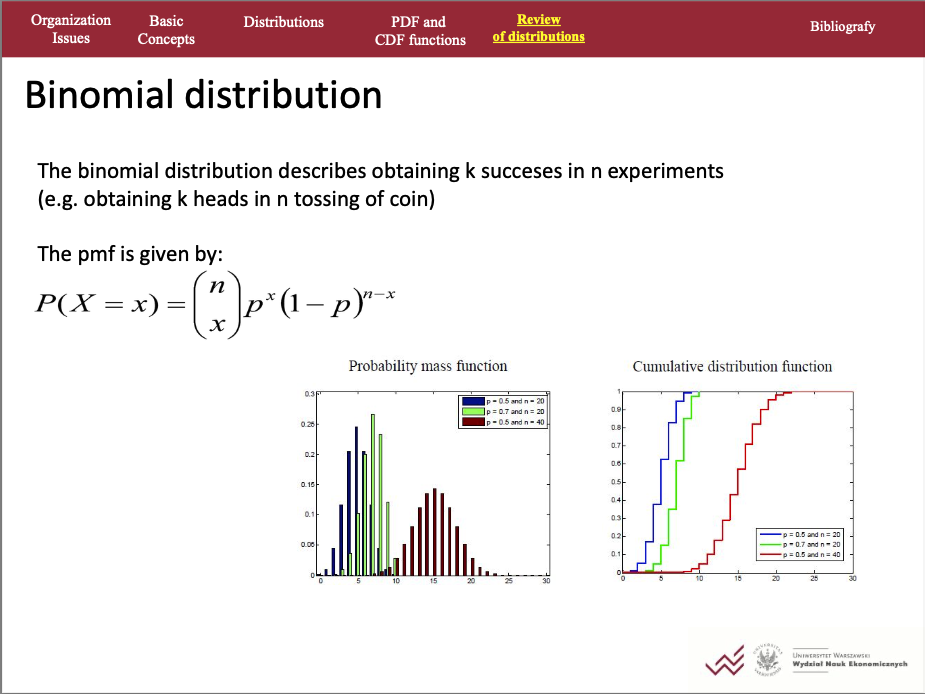

Exercise 1:
Suppose you roll an unfair die 50 times with the probability of obtaining “6” equal to 0.6 (i.e.
we deal with binomial distribution with n=50 and p=0.6).
- Plot the probability density function for this distribution
- What is the probability of obtaining more than 40 times “6”?

In [6]:
def binomial(k, n, p):
    '''Calculate probability of obtaining k successes in n tries'''
    P = (math.factorial(n)/(math.factorial(k)*math.factorial((n-k))))*p**k*(1-p)**(n-k)
    return P

In [7]:
#Preparing data to create a probability density function 
n = 50 
p = 0.6
probDensity = [binomial(k,n,p) for k in range(n)]
kValues = [k for k in range(n)]
df = pd.DataFrame(list(zip(probDensity, kValues)), columns = ["Probability", "k"])

In [8]:
pdf = px.bar(df, x = "k", y = "Probability") 
pdf.show()

What is the probability of obtaining more than 40 times “6”?